## Importing libraries and data
-----

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.constants as sp


file = pd.read_csv('cleaned_data.csv')
shortB = pd.read_excel('data_Summary.xlsx', sheet_name = 'B Short')
shortV = pd.read_excel('data_Summary.xlsx', sheet_name = 'V short')
all_B = pd.read_excel('data_Summary.xlsx', sheet_name = 'All_Bmag', skiprows=15)
all_V = pd.read_excel('data_Summary.xlsx', sheet_name = 'All_V', skiprows=15)

newB = pd.read_excel('data_Summary.xlsx', sheet_name = 'B - 24',  skiprows=15)
newV = pd.read_excel('data_Summary.xlsx', sheet_name = 'V - 24',  skiprows=15)

In [2]:
# viewing first five line to make sure it is correctly extractd from the csv sheet.
all_B.head()

,Peak,Period,Power,Frequency,SDE
0,1,0.104830,8.053007,9.539254,8.053007
1,2,0.043977,1.362765,22.739254,1.362765
2,3,0.020166,1.340856,49.589254,1.340856
3,4,0.016119,0.674711,62.039254,0.674711
4,5,0.037966,0.553016,26.339254,0.553016


----------------
----------------
# Viewing data

## Viewing given csv

In [43]:
file.head()

,Decimal_Date,B_mag,B_magerr,V_mag,V_magerr,B-V
0,23.74464,8.48530,0.05,7.968,0.05,0.51730
1,23.74674,8.57167,0.05,7.701,0.05,0.87067
2,23.75139,8.55101,0.05,7.611,0.05,0.94001
3,23.75603,8.49321,0.05,7.722,0.05,0.77121
4,23.76068,8.39454,0.05,7.653,0.05,0.74154


In [59]:
#(file['Decimal_Date'] % 1)*

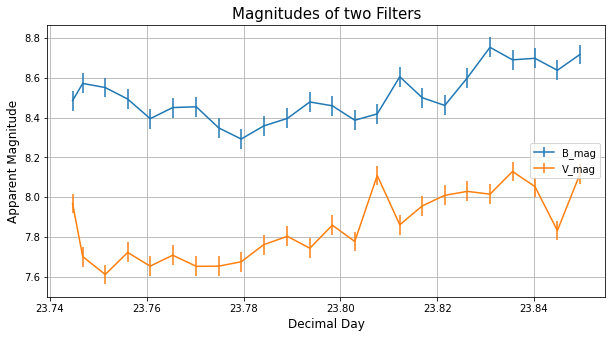

In [3]:
## With errror bars

plt.figure(figsize = (10,5))

plt.title('Magnitudes of two Filters', fontsize = 15)
plt.xlabel('Decimal Day', fontsize = 12)
plt.ylabel('Apparent Magnitude', fontsize = 12)

plt.errorbar(file.Decimal_Date, file.B_mag, yerr= file.B_magerr, label = 'B_mag')
plt.errorbar(file.Decimal_Date, file.V_mag, yerr= file.V_magerr, label = 'V_mag')
#plt.plot(file.Decimal_Date, file.B_mag, label = 'B_mag')
#plt.plot(file.Decimal_Date, file.V_mag, label = 'V_mag')

plt.legend(loc = 'right')
plt.grid()



## Plotting B-V against the Desimal Day

Max =  0.94
Min =  0.309
avr =  0.62


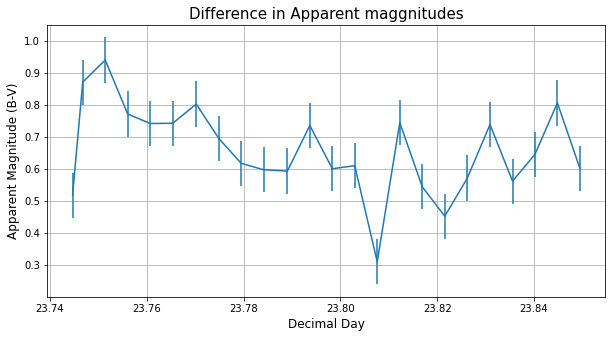

In [4]:
# Making a Differnce coloumb
file['B-V'] = file['B_mag'] - file['V_mag']
file['B-V_err'] = np.sqrt((file['B_magerr'])**2 + (file['B_magerr'])**2)



plt.figure(figsize = (10,5))

plt.title('Difference in Apparent maggnitudes', fontsize = 15)
plt.xlabel('Decimal Day', fontsize = 12)
plt.ylabel('Apparent Magnitude (B-V)', fontsize = 12)


plt.errorbar(file.Decimal_Date, file['B-V'], yerr= file['B-V_err'],  label = 'B-V')
plt.grid()

maxMag = np.max(file['B-V'])
minMag = np.min(file['B-V'])

avgMag = np.mean(file['B-V'])

#file.head()

print('Max = ', np.round(maxMag,3))
print('Min = ', np.round(minMag,3))
print('avr = ', np.round((maxMag+minMag)/2,2))

#avgMag

-------------
## period luminosity relation for delta Scuti stars:
dn -- 
p25

In [25]:
# Mbol -´Mbold “ = ´-3.33logP ` 3.33logQ ´ 10logpTeff{Teffq ´ 1.67logpM{Mdq}


def mBol(Teff):

    Q = 0.033 #d
    mBol_sun = 4.75     #
    Teff_sun = 5800 # Kelvin
    Period = 0.10483 # Rank one From NASA
    #Period = 0.7683 # Rank one From NASA

    ans = -3.33*np.log10(Period) + 3.33*np.log10(Q) - 10*np.log10(Teff/Teff_sun) -1.67*np.log10(1.9) + mBol_sun
    return ans


mBol(5902.26)


2.537012474548522

-------------
## 1.Determining the Period


In [ ]:
## Saved data in All B and All V

#------------------------------
# third study unit memory abstractions such as paging
#------------------------------
all_B.head()

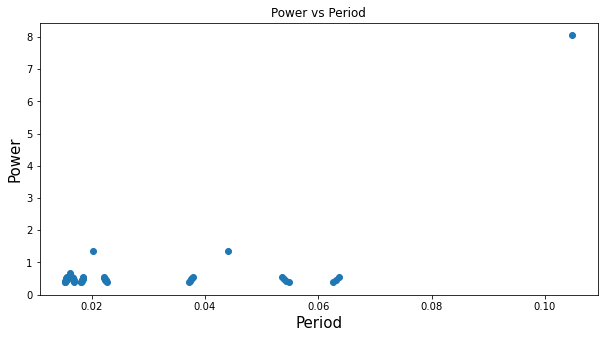

In [99]:
#newB = all_B.sort_values(all_B.Period , ascending=False)
plt.figure(figsize=(10,5))
plt.title('Power vs Period')

plt.xlabel('Period', fontsize = 15)
plt.ylabel('Power', fontsize = 15)
plt.scatter(all_B.Period, all_B.Power)

------------
## 2.Determining the temperature variations of the star

### useless

In [ ]:
#sound = sp.speed_of_sound
#
#
#nf = pd.DataFrame()
#
#nf['B-V'] = file['B_mag'] - file['V_mag']
#nf['fB - fV'] = newB.Frequency - newV.Frequency
#nf['Teff'] = sound/(nf['fB - fV']*0.28978)
#
##newB.head()
##newV.head()
#
#nf.head()

In [ ]:
## Period = 1/freq


lmdMax = 0.28978#*T # lmd -- cm. T -- Kelvin
sound = sp.speed_of_sound

lmd = sound/all_B.Frequency

temp = lmd/0.28978

temp


### Graphing Table
p28

In [118]:
np.round(file['B-V'].mean(),3)

0.659

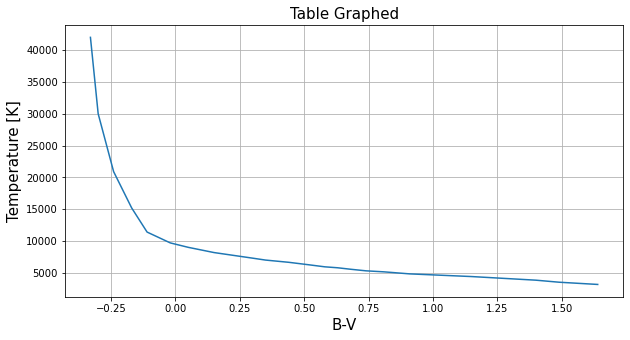

In [107]:
sg = pd.DataFrame()

sg['B-V'] = list([-0.33,-0.31, -0.3, -.24,-.17,-.11, -0.02, 0.05, 0.15, .3, .35, .44, .52, .58, .63, .68,.74,.81,.91,1.15,1.4,1.49,1.64])
sg['Teff'] = list([42000, 34000, 30000,20900,15200,11400,9700, 9000,8180,7300,7000,6650, 6250, 5940,5790,5560, 5310,5150,4830,4410,3840,3520,3170])

plt.figure(figsize=(10,5))
plt.title('Table Graphed',fontsize = 15)
plt.ylabel('Temperature [K]',fontsize = 15)
plt.xlabel('B-V',fontsize = 15)
#plt.plot(sg['Teff'], sg['B-V'])
plt.plot(sg['B-V'],sg['Teff'])
plt.grid()

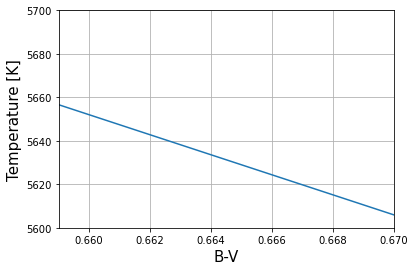

In [130]:
#--- B-V_avb == 0.659 -----
plt.xlim(0.659,.67)
plt.ylim(5600,5700)

plt.ylabel('Temperature [K]',fontsize = 15)
plt.xlabel('B-V',fontsize = 15)
plt.plot(sg['B-V'],sg['Teff'])


plt.grid()


# thus Teff = 5690 K

In [113]:
(5601)/((0.685+.4)**(2/3))

5304.515798498402

### Plot the calibration values on a graph of B-V as function of Teff

B-V = ´-3.684*log(Teff) ` +  14.551  --- for log Teff < 3.961 \
B-V = 0.344*log^2(Teff) - 3.402*log(Teff) + 8.037  ---- for log Teff >3.961


In [142]:
print(np.log10(42000))
print(np.log10(3))


10**(3.961)

4.623249290397901
0.47712125471966244


9141.132414702499

In [ ]:
print(np.log10(9141))
print(10**3.961)

ok = np.arange(0.1 , 3.691,.05)
#print(10**ok[:])

#print((10**np.log10(10**ok)))
10**(-(0.91-14.551)/3.684)

In [58]:
np.arange(100,50,-10)

array([100,  90,  80,  70,  60])

In [134]:
test = pd.DataFrame()

#Teff = np.log10(tempR)
#Teff  = 10**((np.arange(-0.33,3.961, 0.5)))
#Teff  = 10**((np.arange(-0.33,3.961, 0.5)))

tempB = (np.arange(0,7000,50))
tempA = (np.arange(40000,0,-1000))


test['tempA'] = tempA
#test['tempB'] = tempB

test['eq3_8'] = -3.684*np.log10(test['tempA']) + 14.551         #------B-V
#test['eq3_9'] = 0.344*(np.log10(test['tempB'])**2)- 3.402*np.log10(test['tempB']) + 8.037


test.head()



,tempA,eq3_8
0,40000,-2.402989
1,39000,-2.362482
2,38000,-2.320923
3,37000,-2.278255
4,36000,-2.234418


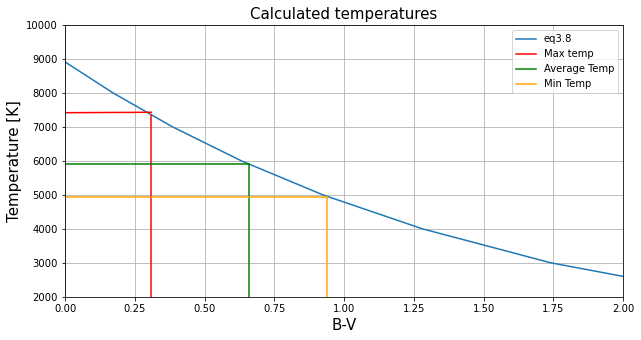

In [176]:
plt.figure(figsize=(10,5))

#plt.plot(sg['Teff'], sg['B-V'], '--', label = 'Table')

plt.title('Calculated temperatures', fontsize = 15)
plt.ylabel('Temperature [K]', fontsize = 15)
plt.xlabel('B-V',fontsize = 15)
plt.plot((test['eq3_8']),tempA, label = 'eq3.8')

#----------Max Bars---------
plt.plot([0.309 ,0.309], [0,7341], color = 'red', label = 'Max temp')
plt.plot([-2 ,0.309], [7341,7431], color = 'red')


#----------AVergae Bars---------
plt.plot([0.659 ,0.659], [0,5903], color = 'green', label = 'Average Temp')
plt.plot([-2 ,0.659], [5903,5903], color = 'green')


#----------Min Bars---------
plt.plot([0.94 ,0.94],  [0,4950], color = 'orange', label = 'Min Temp')
plt.plot([-2 ,0.94], [4950,4950], color = 'orange')


#plt.xticks(np.arange(-2, 3, step=0.6))

#plt.xlim(0.645,0.665)
plt.ylim(top= 10000, bottom = 2000)
plt.xlim(left = 0, right = 2)

plt.legend()
plt.grid()

### Thus draw a graph of m_B-m_V vs Teff

In [177]:
avrB = file['B-V'].mean()
maxB = file['B-V'].max()
minB = file['B-V'].min()

tempA = 10**((14.551-avrB)/3.684)
tempMx = 10**((14.551-maxB)/3.684)
tempMn = 10**((14.551-minB)/3.684)

print(tempMx)
print(tempA )
print(tempMn)

4950.199394688961
5902.263496303527
7341.6320855294125


-----------------------
------------------
## pLAYING

-----------
## 3.Calculating the absolute V magnitude

In [184]:
## From the Graph on p29---
# The Bolemetric Correction (BC) value is -- -0.02

Teff = tempA
BCv = -0.02

Mv = mBol(Teff) - BCv
# ^MUST BE 1.89

### m - Mv = 5log(d/10)
m = file['V_mag'].mean()

#x = ((m-Mv+5)/5)
x = ((m-Mv+5)/5)
logf = 10**x


print('apprnt V-mag:\t\t', np.round(m,3))
print('B-V avr:\t\t', file['B-V'].mean())
print('Teff:\t\t\t', Teff)
print('Bolematric of our Star:\t', mBol(Teff))
print('Bolematric of V-filter:\t', Mv)
print('Distance is:\t\t', np.round(logf,3), 'parsec')

apprnt V-mag:		 7.85
B-V avr:		 0.6585674999999999
Teff:			 5902.263496303527
Bolematric of our Star:	 2.5370099019324748
Bolematric of V-filter:	 2.557009901932475
Distance is:		 114.432 parsec


---
## 4.Distance with Dist Modulus